# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bista*

<b> Classification d'images de fruits </b> : *apples, bananas, coconuts, grapes, lemons, limes, mangos, oranges, pineapples, tomatoes*.

In [2]:
import os
import sys
import shutil
import numpy as np
import PIL
from PIL import Image
from scipy.io import loadmat
import matplotlib.pyplot as plt
sys.path.insert(1, "./scripts")
import LoadData

<b> Accès à la base de données </b>
1. Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [3]:
# Version distante (1)
# !git clone https://github.com/EnzoN7/Image-classification.git
# path = "./Image-classification/images/"

# Version locale (2)
path = "./images/"

<b> Stockage des fichiers au sein de tenseurs </b>

In [4]:
labels = ['apples', 'bananas', 'coconuts', 'grapes', 'lemons', 'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train, y_train = LoadData.load_data(path, labels, dataset='train', image_size=64)
x_val, y_val = LoadData.load_data(path, labels, dataset='validation', image_size=64)
x_test, y_test = LoadData.load_data(path, labels, dataset='test', image_size=64)

x_train.shape = (1875, 64, 64, 3)
y_train.shape = (1875, 1)


 20% (2 of 10) |#####                    | Elapsed Time: 0:00:11 ETA:   0:00:27

<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

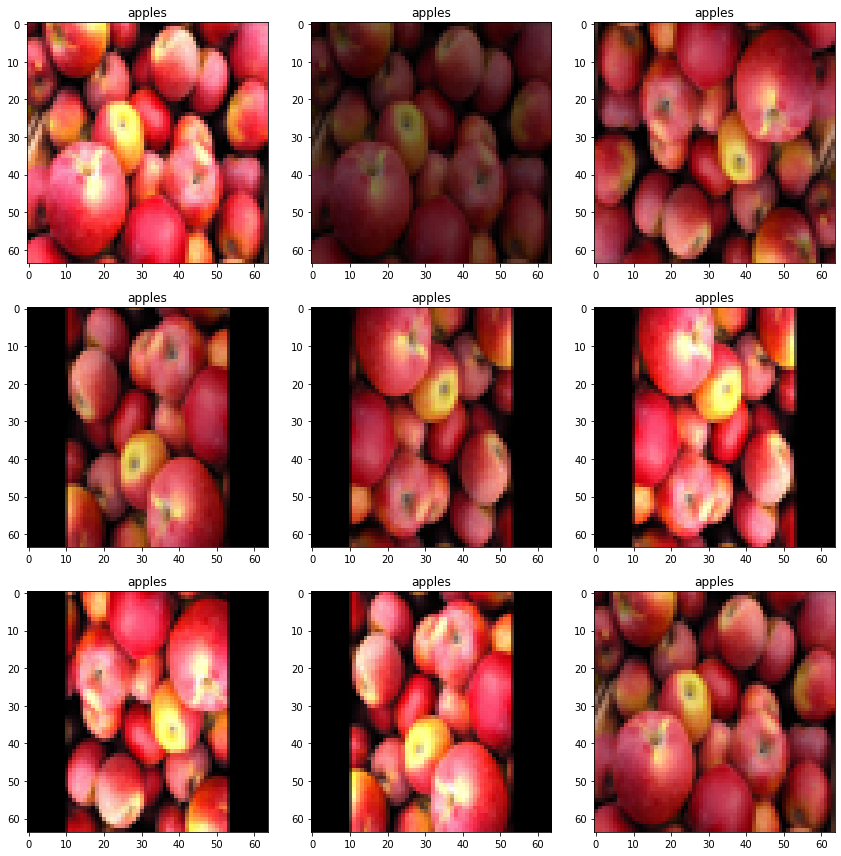

In [ ]:
plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()